In [3]:
%matplotlib inline
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import requests
import descartes
import calendar
import seaborn as sns
import matplotlib
# Loading data (https://www.nti.org/analysis/articles/cns-north-korea-missile-test-database/). Encoding problem solved with 'unicode_escape'.
df = pd.read_csv('../data/north_korea_missile_test_database.csv', encoding= 'unicode_escape', index_col= "F1")
# Dropping unused columns.
df = df.drop(columns=['Launch Agency/Authority', 'Other Name', 'Additional Information', 'Source(s)', 'Launch Time (UTC)', 'Date Entered/Updated', 'Apogee'])
# Changing formats (str to int or float)
df['Distance Travelled'] = df['Distance Travelled'].apply(lambda x: x.replace('km', '') if isinstance(x, str) else x)
# And then, convert 'Unkown' values to numerics.
df['Distance Travelled'] = df['Distance Travelled'].replace('Unknown', 'NaN') 
# Finally, I can change it to numeric pandas table.
df['Distance Travelled'] = pd.to_numeric(df['Distance Travelled'], errors='coerce').fillna(0)
df['Landing Location'] = df['Landing Location'].apply(lambda x: x.replace('330km east of Hachinohe and 4000 km out into Pacific Ocean', '330km east of Hachinohe') if isinstance(x, str) else x)
# Changing 'location' data
df['Facility Latitude'] = pd.to_numeric(df['Facility Latitude'], errors='coerce')
df['Facility Longitude'] = pd.to_numeric(df['Facility Longitude'], errors='coerce')
# Date changes
df['Date'] = pd.to_datetime(df['Date'])
# Creating a new column for separating the year values in numeric format.
df['Year'] = df['Date'].dt.year
# Another column for changing number values to string values.
df['Month_Number'] = df['Date'].dt.month
# Another column for separating values to month specifically.
df['Month'] = df['Month_Number'].apply(lambda x: calendar.month_abbr[x])
# Another column for counting test numbers.
df["# of Test"] = 1
# Simplifying the Year/Month format.
df['YYYYMM'] = pd.to_datetime(df['Date'], format='%Y%m', errors='coerce')
df['YYYYMM'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m')

Part 1. Required codes

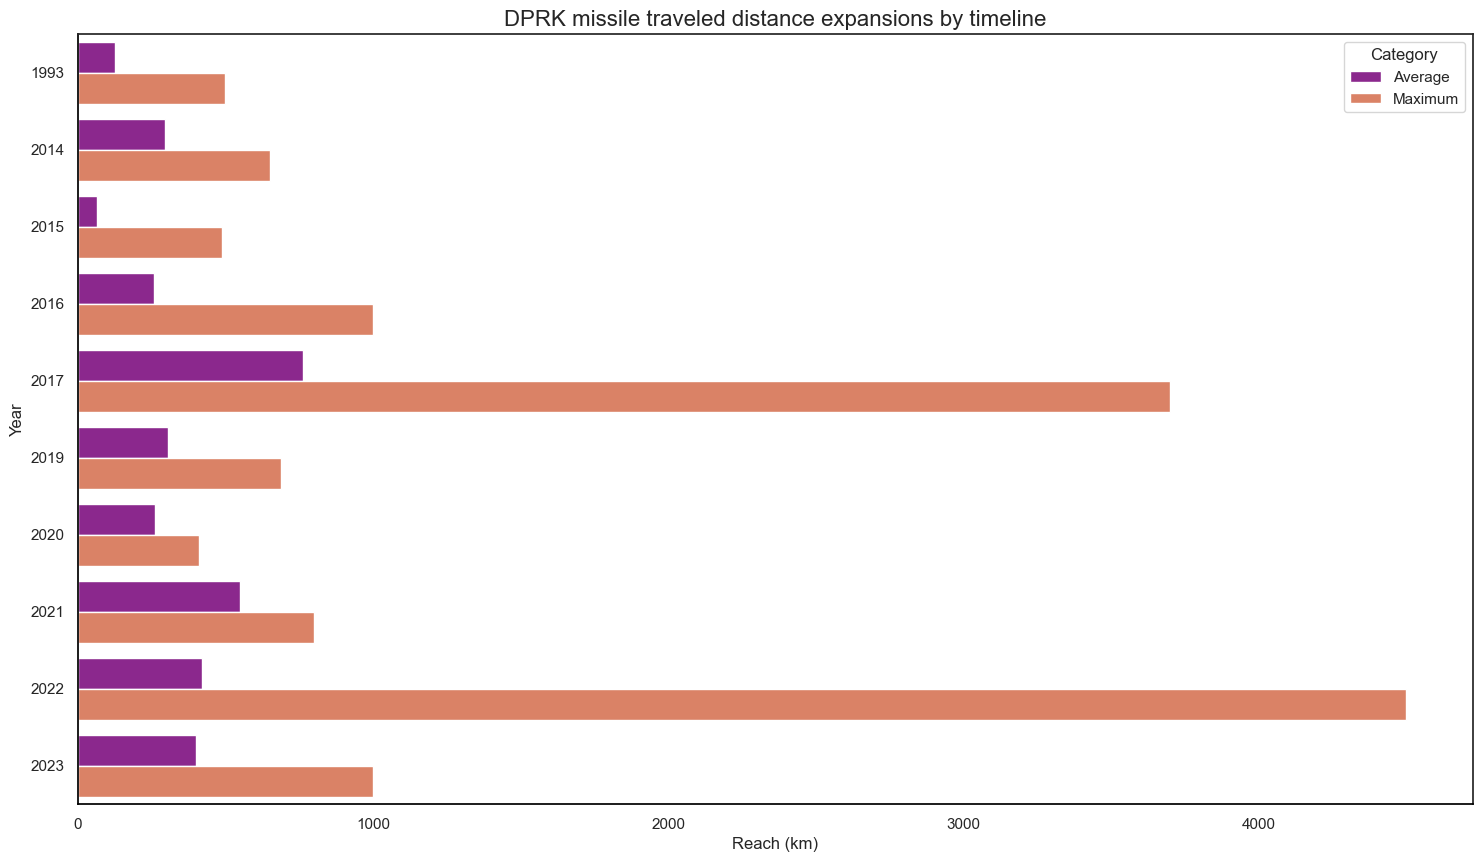

In [4]:
# This chart requires two different values (max & mean). Therefore, the following lines defines both max range and mean range
df_distance = df[['Year','Distance Travelled']]
grouped_distance = df_distance.groupby('Year')
df_range_max = grouped_distance.max().reset_index()
df_range_max = df_range_max.dropna()
df_range_max.rename(columns = {"Distance Travelled": "Reach (km)"}, inplace=True)
df_range_max['Category'] = "Maximum"
# Here starts the mean range
df_distance = df[['Year','Distance Travelled']]
grouped_distance = df_distance.groupby('Year')
df_range_mean = grouped_distance.mean().reset_index()
df_range_mean = df_range_mean.dropna()
df_range_mean.rename(columns = {"Distance Travelled": "Reach (km)"}, inplace=True)
df_range_mean['Category'] = "Average"
# Now, concatenate two data (max & mean) to blend two data in a same bar
df_reach = pd.concat([df_range_mean,df_range_max])
df_reach = df_reach[df_reach['Reach (km)'] != 0.0]
# Configuration
fig = plt.figure(figsize=(18, 10))
ax1 = sns.set_theme(style="white")
ax1 = plt.gca().spines['left'].set_color('black')
ax1 = plt.gca().spines['bottom'].set_color('black')
plt.title('DPRK missile traveled distance expansions by timeline', fontsize = 16, loc='center')
# Creating a plot
ax1 = sns.barplot(x='Reach (km)', y='Year', hue="Category", data=df_reach, orient="h", palette="plasma")
# Setting the tick marks
xticks = np.arange(0, df_reach['Reach (km)'].max()+250, 250)

2. Additional codes for better visualization (xticks and texts)

In [ ]:
# xticks lines
for xtick in xticks:
    plt.axvline(xtick, -1, 5, color='lightgray', linestyle='--', linewidth='1')
# Adding comments 
ax1 = plt.text(500, 0, 'May 93\nMRBM\n(Sea of Japan)', fontsize=10, color='red', horizontalalignment='center')
ax1 = plt.text(3650, 4, 'Sep 17\nIRBM\n(Pacific Ocean)', fontsize=10, color='red', horizontalalignment='center')
ax1 = plt.text(4470, 8, 'Oct 22\nIRBM\n(Pacific Ocean)', fontsize=10, color='red', horizontalalignment='center')
ax1 = plt.legend(loc='upper right')